<a href="https://colab.research.google.com/github/Smarth2005/Machine-Learning/blob/main/Mini%20Projects/Vehicle%20Count%20Prediction/Vehicle%20Count%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Vehicle Count Prediction from sensor data**

<div align="justify">

Modern urban traffic systems require accurate and timely predictions of vehicle flow to manage congestion, optimize signal timing, and plan infrastructure improvements. Sensors at road junctions continuously collect time-stamped vehicle count data.

In this project, we aim to predict hourly vehicle counts at road junctions using machine learning techniques. By leveraging time-based features extracted from sensor data, we seek to model traffic patterns and provide actionable insights for transport managers.
</div>


Datasource : [GFG] https://www.geeksforgeeks.org/vehicle-count-prediction-from-sensor-data/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving vehicles.csv to vehicles (2).csv


In [3]:
df = pd.read_csv('vehicles.csv')
df.head()

,DateTime,Vehicles
0,2015-11-01 00:00:00,15
1,2015-11-01 01:00:00,13
2,2015-11-01 02:00:00,10
3,2015-11-01 03:00:00,7
4,2015-11-01 04:00:00,9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Vehicles  48120 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 752.0+ KB


In [5]:
# Convert the datatype of 'DateTime' to datetime type
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Vehicles  48120 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 752.0 KB


In [7]:
# Extract time-based features
df['date']       = df['DateTime'].dt.day
df['weekday']    = df['DateTime'].dt.weekday
df['hour']       = df['DateTime'].dt.hour
df['month']      = df['DateTime'].dt.month
df['year']       = df['DateTime'].dt.year
df['dayofyear']  = df['DateTime'].dt.dayofyear
df['weekofyear'] = df['DateTime'].dt.isocalendar().week  # or .dt.isocalendar()['week']

df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)

In [8]:
# Add lag features
df['lag_1'] = df['Vehicles'].shift(1)
df['lag_2'] = df['Vehicles'].shift(2)
df['lag_3'] = df['Vehicles'].shift(3)

# Drop rows with NaN in lag features (from shifting)
df = df.dropna()

In [9]:
df.head()

,DateTime,Vehicles,date,weekday,hour,month,year,dayofyear,weekofyear,is_weekend,lag_1,lag_2,lag_3
3,2015-11-01 03:00:00,7,1,6,3,11,2015,305,44,1,10.0,13.0,15.0
4,2015-11-01 04:00:00,9,1,6,4,11,2015,305,44,1,7.0,10.0,13.0
5,2015-11-01 05:00:00,6,1,6,5,11,2015,305,44,1,9.0,7.0,10.0
6,2015-11-01 06:00:00,9,1,6,6,11,2015,305,44,1,6.0,9.0,7.0
7,2015-11-01 07:00:00,8,1,6,7,11,2015,305,44,1,9.0,6.0,9.0


In [10]:
df.shape

(48117, 13)

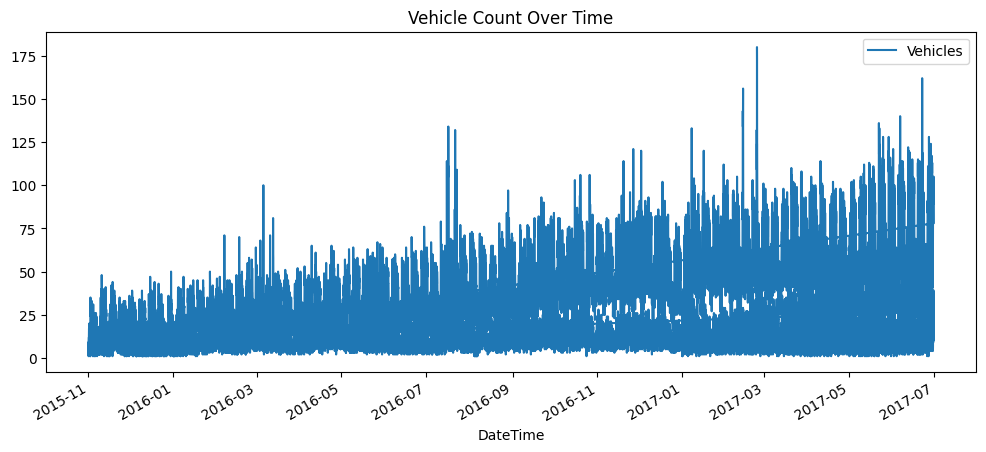

In [11]:
# Data Analysis

# Vehicle count over time
df.plot(x='DateTime', y='Vehicles', figsize=(12, 5))
plt.title('Vehicle Count Over Time')
plt.show()

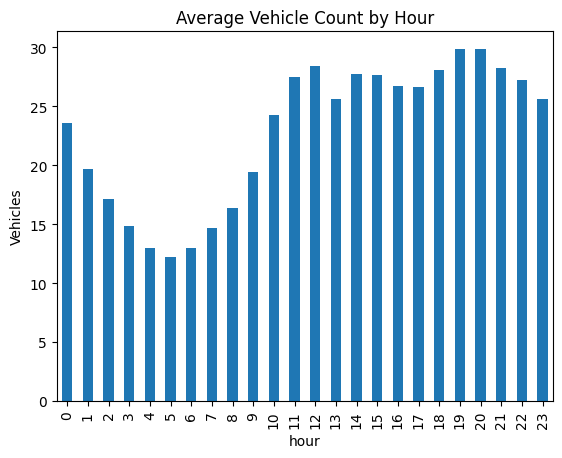

In [12]:
# Average vehicle count by hour
df.groupby('hour')['Vehicles'].mean().plot(kind='bar')
plt.title('Average Vehicle Count by Hour')
plt.ylabel('Vehicles')
plt.show()

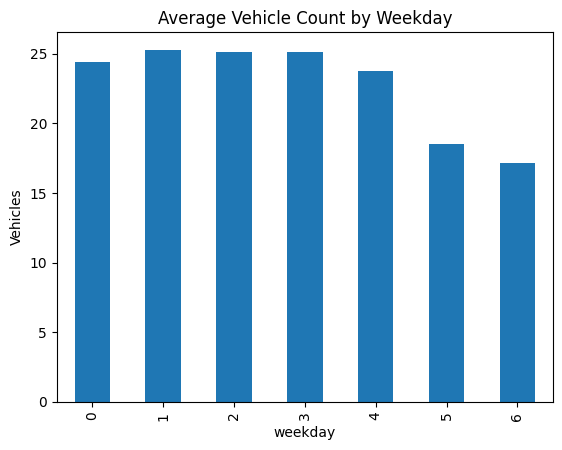

In [13]:
# Average vehicle count by weekday
df.groupby('weekday')['Vehicles'].mean().plot(kind='bar')
plt.title('Average Vehicle Count by Weekday')
plt.ylabel('Vehicles')
plt.show()


In [14]:
df.head()

,DateTime,Vehicles,date,weekday,hour,month,year,dayofyear,weekofyear,is_weekend,lag_1,lag_2,lag_3
3,2015-11-01 03:00:00,7,1,6,3,11,2015,305,44,1,10.0,13.0,15.0
4,2015-11-01 04:00:00,9,1,6,4,11,2015,305,44,1,7.0,10.0,13.0
5,2015-11-01 05:00:00,6,1,6,5,11,2015,305,44,1,9.0,7.0,10.0
6,2015-11-01 06:00:00,9,1,6,6,11,2015,305,44,1,6.0,9.0,7.0
7,2015-11-01 07:00:00,8,1,6,7,11,2015,305,44,1,9.0,6.0,9.0


In [15]:
df = df.sort_values('DateTime')

In [16]:
df.head()

,DateTime,Vehicles,date,weekday,hour,month,year,dayofyear,weekofyear,is_weekend,lag_1,lag_2,lag_3
29184,2015-11-01 00:00:00,9,1,6,0,11,2015,305,44,1,27.0,29.0,31.0
14592,2015-11-01 00:00:00,6,1,6,0,11,2015,305,44,1,78.0,84.0,90.0
14593,2015-11-01 01:00:00,6,1,6,1,11,2015,305,44,1,6.0,78.0,84.0
29185,2015-11-01 01:00:00,7,1,6,1,11,2015,305,44,1,9.0,27.0,29.0
29186,2015-11-01 02:00:00,5,1,6,2,11,2015,305,44,1,7.0,9.0,27.0


In [17]:
# Separate independent and dependent features
X = df.drop(['Vehicles','DateTime'], axis=1)
y = df['Vehicles']

In [18]:
X.head()

,date,weekday,hour,month,year,dayofyear,weekofyear,is_weekend,lag_1,lag_2,lag_3
29184,1,6,0,11,2015,305,44,1,27.0,29.0,31.0
14592,1,6,0,11,2015,305,44,1,78.0,84.0,90.0
14593,1,6,1,11,2015,305,44,1,6.0,78.0,84.0
29185,1,6,1,11,2015,305,44,1,9.0,27.0,29.0
29186,1,6,2,11,2015,305,44,1,7.0,9.0,27.0


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48117 entries, 29184 to 48119
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        48117 non-null  int32  
 1   weekday     48117 non-null  int32  
 2   hour        48117 non-null  int32  
 3   month       48117 non-null  int32  
 4   year        48117 non-null  int32  
 5   dayofyear   48117 non-null  int32  
 6   weekofyear  48117 non-null  UInt32 
 7   is_weekend  48117 non-null  int64  
 8   lag_1       48117 non-null  float64
 9   lag_2       48117 non-null  float64
 10  lag_3       48117 non-null  float64
dtypes: UInt32(1), float64(3), int32(6), int64(1)
memory usage: 3.2 MB


In [20]:
y.head()

,Vehicles
29184,9
14592,6
14593,6
29185,7
29186,5


In [21]:
# Data splitting into training and testing sets
# Since Since this is time series data, we CAN NOT use random split — but use a time-based split.
split_idx = int(0.8 * len(df))

X_train = X.iloc[:split_idx]
X_test = X.iloc[split_idx:]

y_train = y.iloc[:split_idx]
y_test = y.iloc[split_idx:]

In [22]:
# Model training using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate
print(f"MAE  : {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²   : {r2_score(y_test, y_pred):.2f}")

mse =  mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE : {rmse:.2f}")

MAE  : 3.22
R²   : 0.97
RMSE : 5.09


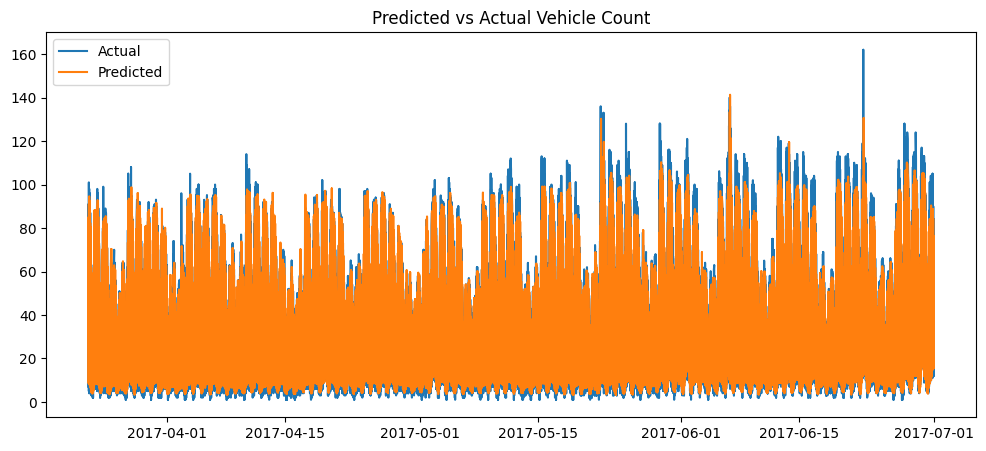

In [23]:
# Visulaization 'Predicted' vs 'Actual'
plt.figure(figsize=(12, 5))
plt.plot(df['DateTime'].iloc[split_idx:], y_test.values, label='Actual')
plt.plot(df['DateTime'].iloc[split_idx:], y_pred, label='Predicted')
plt.legend()
plt.title('Predicted vs Actual Vehicle Count')
plt.show()


In [24]:
# Tuning the Random Forest Regression model
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_grid, n_iter=10, cv=3, n_jobs=-1)
search.fit(X_train, y_train)

print(search.best_params_)

{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None}


In [25]:
# Predictions using the tuned Random Forest model
best_rf = search.best_estimator_

y_pred = best_rf.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²  : {r2:.2f}")


MAE : 3.16
RMSE: 5.03
R²  : 0.97


The Random Forest model achieves an R² score of 0.97 (97% accuracy). Hyperparameter tuning leads to a marginal improvement in performance, with a slight decrease in MAE and RMSE.

In [26]:
# Trying XGBoost Regressor
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

In [27]:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MAE : {mae_xgb:.2f}")
print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost R²  : {r2_xgb:.2f}")

XGBoost MAE : 3.05
XGBoost RMSE: 4.81
XGBoost R²  : 0.97


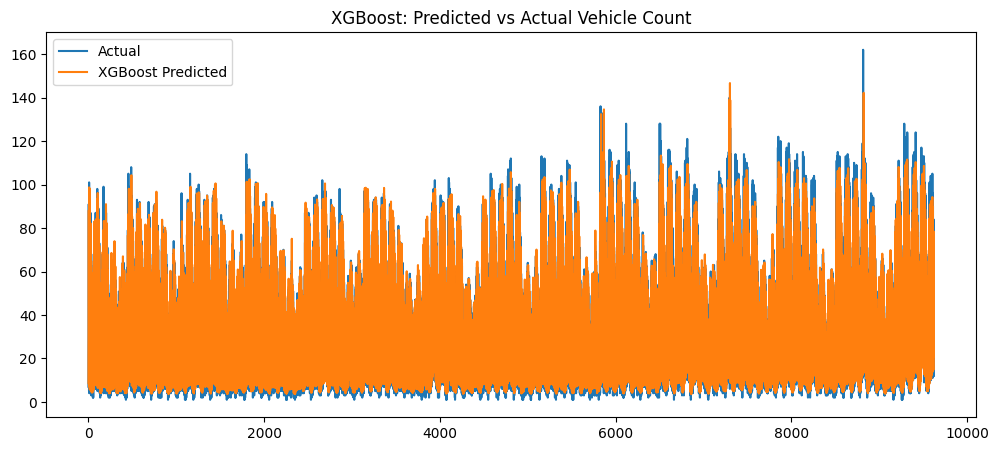

In [28]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_xgb, label='XGBoost Predicted')
plt.legend()
plt.title('XGBoost: Predicted vs Actual Vehicle Count')
plt.show()

The XGBoost model achieves an R² score of 0.97, matching Random Forest’s accuracy while significantly reducing MAE and RMSE, thereby delivering more precise predictions.

In [29]:
# Testing the XGBoost model on Training set
y_pred_xgb_train = xgb.predict(X_train)

mae_xgb_train = mean_absolute_error(y_train, y_pred_xgb_train)
rmse_xgb_train = np.sqrt(mean_squared_error(y_train, y_pred_xgb_train))
r2_xgb_train = r2_score(y_train, y_pred_xgb_train)

print(f"XGBoost Train MAE : {mae_xgb_train:.2f}")
print(f"XGBoost Train RMSE: {rmse_xgb_train:.2f}")
print(f"XGBoost Train R²  : {r2_xgb_train:.2f}")


XGBoost Train MAE : 2.30
XGBoost Train RMSE: 3.39
XGBoost Train R²  : 0.97


The XGBoost model achieved an R² score of 0.97 on both the training and test sets, with a training MAE of 2.30 and test MAE of 3.05. This indicates excellent generalization and precise predictions on unseen data.

Given that XGBoost already achieves high accuracy and low error, further hyperparameter tuning is optional and expected to provide only marginal gains.

In [30]:
import joblib

# Save XGBoost model
joblib.dump(xgb, 'XGBoost Vehicle Count model.pkl')

print("✅ XGBoost model saved as 'XGBoost Vehicle Count model.pkl'")

✅ XGBoost model saved as 'XGBoost Vehicle Count model.pkl'


In [31]:
files.download('XGBoost Vehicle Count model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>